## Cwiczenia związane z uczeniem neuroonu z rónymi funkcjami aktywacji dla logiki AND oraz OR
# Wykonał Przemysław Klejno

In [22]:
import numpy as np
import matplotlib.pyplot as plt

or_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
or_labels = np.array([0, 1, 1, 1])

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

def heaviside(x):
    return np.heaviside(x, 0)

In [23]:

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.learning_rate = learning_rate
        self.errors = []
        self.success_rates = []
        
    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        return heaviside(weighted_sum)
        
    def train(self, training_inputs, labels, epochs = 1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            #on every epoch calculate the error and success rate
            self.errors.append(np.mean(([self.predict(input) for input in training_inputs] - labels) ** 2))
            self.success_rates.append(np.mean([self.predict(input) == label for input, label in zip(training_inputs, labels)]))


In [24]:
# and logic perceptron training
perceptronAnd = Perceptron(2)
perceptronAnd.train(and_inputs,and_labels,10)

 input: [0 0] predicted value: 0.0 should be: 0
 input: [0 1] predicted value: 0.0 should be: 0
 input: [1 0] predicted value: 0.0 should be: 0
 input: [1 1] predicted value: 1.0 should be: 1


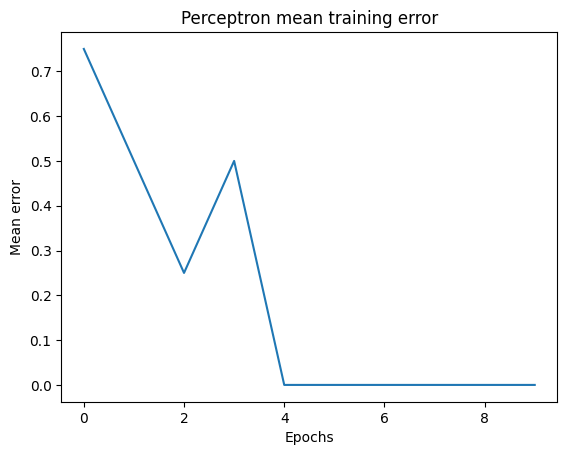

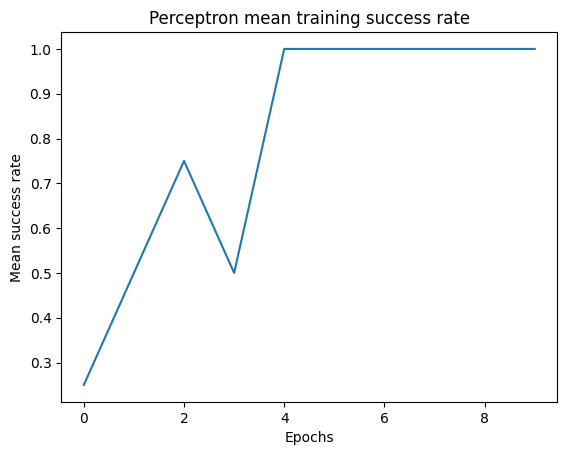

In [25]:
# and logic
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {perceptronAnd.predict(and_input)} should be: {and_label}')

plt.plot(perceptronAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Perceptron mean training error')
plt.show()

plt.plot(perceptronAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Perceptron mean training success rate')
plt.show()



In [26]:
# or logic perceptron training
perceptronOr =  Perceptron(2)
perceptronOr.train(or_inputs, or_labels, 10)

inputs: [0 0] predicted: 0.0 true: 0
inputs: [0 1] predicted: 1.0 true: 1
inputs: [1 0] predicted: 1.0 true: 1
inputs: [1 1] predicted: 1.0 true: 1


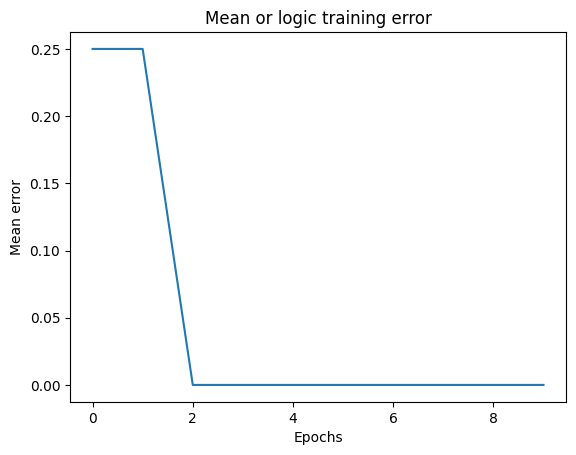

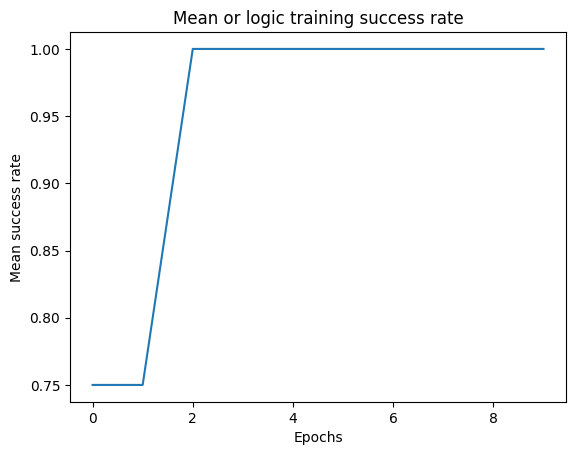

In [27]:
# check results after training
for or_input, or_label in zip(or_inputs, or_labels):
    print(f'inputs: {or_input} predicted: {perceptronOr.predict(or_input)} true: {or_label}')

plt.plot(perceptronOr.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean or logic training error')
plt.show()

plt.plot(perceptronOr.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean or logic training success rate')
plt.show()

## Wnisoki z uzycia funkcji skokowej (heaviside)

- funkcja bardzo szybko zaczeła podawać dokładny wynik (juz po kilku iteracjach, co jest widoczne na wykresie, w momencie kiedy wykresy sukcesu i błędu się odwracają)
- funkcja sprawuje się bardzo dobrze dla wynikowych całkowitych, w zakresie od -1 do 1 (z tego powodu ze funkcja skokowa zwraca takie wartości -1, 0, 1)
- podczas liczenia błędu nie mozna zastosować wartości absolutnej błędu (np.abs) poniewaz perceptron się wtedy nie nauczy (nie będzie odejmował od wagi perceptronu jeśli błąd będzie ujemny)

In [28]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Sigmoid:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.learning_rate = learning_rate
        self.errors = []
        self.success_rates = []
        
    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        return sigmoid(weighted_sum)
        
    def train(self, training_inputs, labels, epochs = 1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            #on every epoch calculate the error and success rate
            self.errors.append(np.mean(([self.predict(input) for input in training_inputs] - labels) ** 2))
            self.success_rates.append(np.mean([self.predict(input) == label for input, label in zip(training_inputs, labels)]))

## 1. Próba nauczenia neuronu dla funckji sigmoidalnej, ilość cykli 100 tysięcy, learning rate = 0.1

In [29]:
# and logic perceptron training
sgmoidAnd = Sigmoid(2)
sgmoidAnd.train(and_inputs,and_labels,100000)

 input: [0 0] predicted value: 3.850808126696863e-06 should be: 0
 input: [0 1] predicted value: 0.013792704348979279 should be: 0
 input: [1 0] predicted value: 0.013795048270924877 should be: 0
 input: [1 1] predicted value: 0.9806958524298784 should be: 1


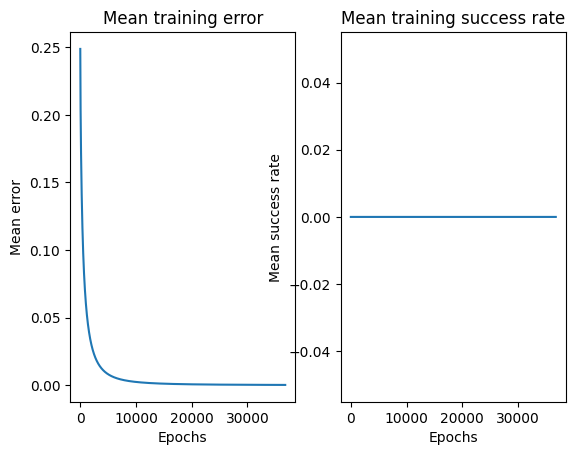

In [34]:
# and logic
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {sgmoidAnd.predict(and_input)} should be: {and_label}')

plt.subplot(1, 2, 1)
plt.plot(sgmoidAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean training error')

plt.subplot(1, 2, 2)
plt.plot(sgmoidAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean training success rate')

plt.show()

# Wnioski po zastosowaniu 100 000 cykli oraz learning rate = 0.1

- Bład zmniejsza się i jest bardzo blisko wartości 0 ale nigdy jej nie osiąga (co jest widoczne w mean success rate)
- Przewidywane wartości są bardzo blisko realnych wartości (brakuje tysięcznych części)
- Wynika to prawdopodobnie z tego, ze dla learning rate = 0.1 neuron próbuje korygować wartości ale po prostu robi taką piłę gdy jest bardzo blisko dobrej wartości
- Prawdopodbnie, zeby osiągnąc dokładną realną wartość trzeba zmniejszyc learning rate
- nauka trwała około 8 sekund

## 2. Próba nauczenia neuronu sigmoidalnego, ilość cykliL 100 tysięcy, learning rate 0.01


 input: [0 0] predicted value: 1.84180486977863e-07 should be: 0
 input: [0 1] predicted value: 0.005056911570761732 should be: 0
 input: [1 0] predicted value: 0.005057229539930558 should be: 0
 input: [1 1] predicted value: 0.9929212460768045 should be: 1


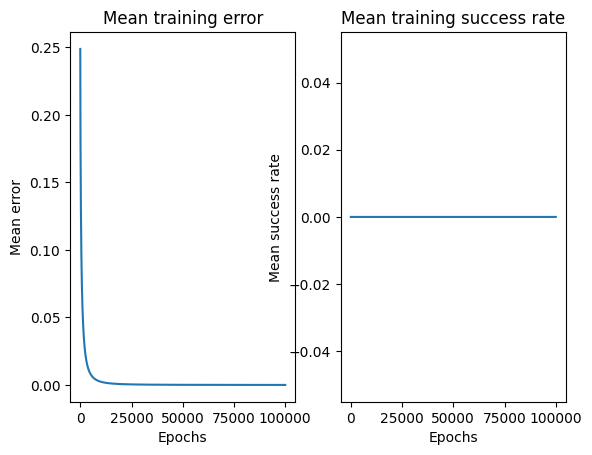

In [35]:
sgmoidAnd = Sigmoid(2, 0.01)
sgmoidAnd.train(and_inputs,and_labels,100000)

for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {sgmoidAnd.predict(and_input)} should be: {and_label}')

plt.subplot(1, 2, 1)
plt.plot(sgmoidAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean training error')

plt.subplot(1, 2, 2)
plt.plot(sgmoidAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean training success rate')

plt.show()

## Wnioski po 2 próbie (cykle: 100000, learning rate: 0.01)

- neuron uczył się wolniej, zeby osiagnac error rate blisko 0
- nadal nie osiągnął idealnej wartości, co jest widoczne na wykresie success rate
- nauka neuronu trwała 28 sekund

## 3. Próba nauczenia neuronu sigmoidalnego, ilość cykli: 100 000, learning rate 0.00001

 input: [0 0] predicted value: 0.05145965206344604 should be: 0
 input: [0 1] predicted value: 0.2377578140411733 should be: 0
 input: [1 0] predicted value: 0.23776223968673316 should be: 0
 input: [1 1] predicted value: 0.6420165136214206 should be: 1


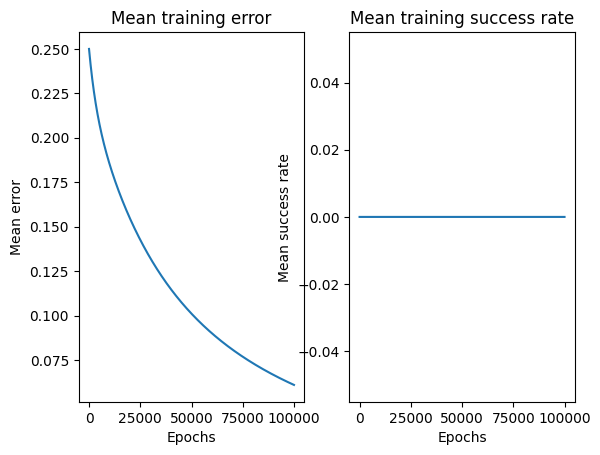

In [36]:
sgmoidAnd = Sigmoid(2, 0.0001)
sgmoidAnd.train(and_inputs,and_labels,100000)

for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {sgmoidAnd.predict(and_input)} should be: {and_label}')

plt.subplot(1, 2, 1)
plt.plot(sgmoidAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean training error')

plt.subplot(1, 2, 2)
plt.plot(sgmoidAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean training success rate')

plt.show()

## Wnioski po 3 próbie uczenia, 100 000 cykli, learning rate 0.00001

- Uczenie się trwało dłuej, średni błąd nie doszedł w okolice 0, co widać na wykresie średniego błędu
- uczenie się trwało około 15 sekund
- przewidywania były bardziej odległe niz dla takiej samej liczby cykli, ale z learning rate 0.01, dla prawdziwej wartości 1, było to około: 0.64 a dla 0 było to około: 0.24

## 4. Próba 1 milion cykli, learning rate 0.00001

 input: [0 0] predicted value: 0.00019731516790541317 should be: 0
 input: [0 1] predicted value: 0.04911277548228416 should be: 0
 input: [1 0] predicted value: 0.04911306166371559 should be: 0
 input: [1 1] predicted value: 0.9311162935710032 should be: 1


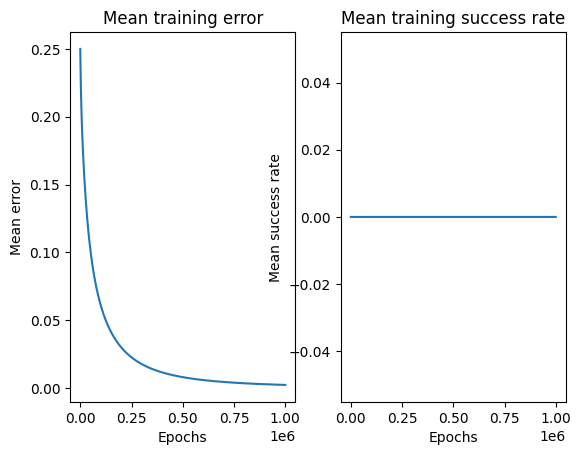

In [37]:
sgmoidAnd = Sigmoid(2, 0.0001)
sgmoidAnd.train(and_inputs,and_labels,1000000)

for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {sgmoidAnd.predict(and_input)} should be: {and_label}')

plt.subplot(1, 2, 1)
plt.plot(sgmoidAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean training error')

plt.subplot(1, 2, 2)
plt.plot(sgmoidAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean training success rate')

plt.show()

## Wnioski z 4 próby uczenia neuronu sigmoidalnego:

- uczenie trwało około 2 minuty 23 sekundy
- Przewidziane liczby było bardzo bliskie wartości rzeczywistej
- wykres średniego błędu przyjął formę miękkiej krzywej - przez co mozna zauwazyc, ze neuron uczył się wolniej

## Neuron sigmoidalny dla logiki OR

In [32]:
# or logic perceptron training
sigmoidOr =  Sigmoid(2)
sigmoidOr.train(or_inputs, or_labels, 100000)

In [39]:
# check results after training
for or_input, or_label in zip(or_inputs, or_labels):
    print(f'inputs: {or_input} predicted: {sigmoidOr.predict(or_input)} true: {or_label}')

inputs: [0 0] predicted: 0.0005009428843322357 true: 0
inputs: [0 1] predicted: 0.9997996424831853 true: 1
inputs: [1 0] predicted: 0.9997996344688111 true: 1
inputs: [1 1] predicted: 0.9999999999798717 true: 1


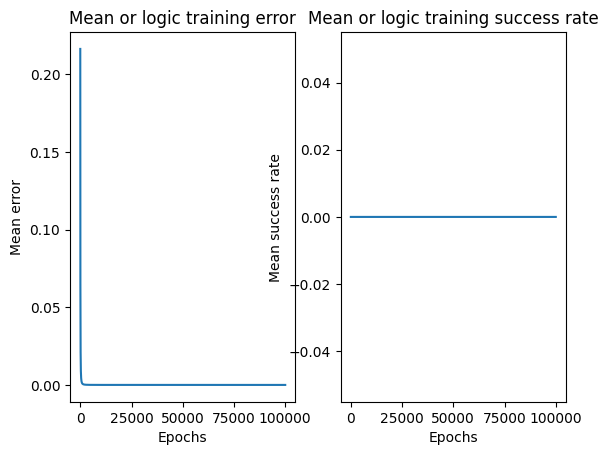

In [40]:
# plot the results
plt.subplot(1, 2, 1)
plt.plot(sigmoidOr.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean error')
plt.title('Mean or logic training error')

plt.subplot(1, 2, 2)
plt.plot(sigmoidOr.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean success rate')
plt.title('Mean or logic training success rate')

plt.show()

## Wnioski z uycia funkcji sigmoidalnej dla logiki OR i AND

- funkcja sigmoidalna zblizała się do prawdziwej wartości, ale nigdy jej nie osiągneła
- zauwaono zaleność, ze dla mniejszego learning rate, nalezy zwiekszyc liczbe cykli aby osiągnąc dokładniejsze przewidywania
- mozna zaimplementowac lepszy algorytm uczenia, ktory dla coraz wiekszej liczby cykli bedzie zmniejszac learning rate w trakcie uczenia

In [44]:
def relu(x):
    if x >= 0:
        return x
    else: 
        return 0

In [42]:
class ReluNeuron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.learning_rate = learning_rate
        self.errors = []
        self.success_rates = []
        
    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        return relu(weighted_sum)
        
    def train(self, training_inputs, labels, epochs = 1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            #on every epoch calculate the error and success rate
            self.errors.append(np.mean(([self.predict(input) for input in training_inputs] - labels) ** 2))
            self.success_rates.append(np.mean([self.predict(input) == label for input, label in zip(training_inputs, labels)]))

## Uczenie neurona opartego na funkcji relu dla logiki and, ilość cykli 100 tysięcy, learning rate 0.1:

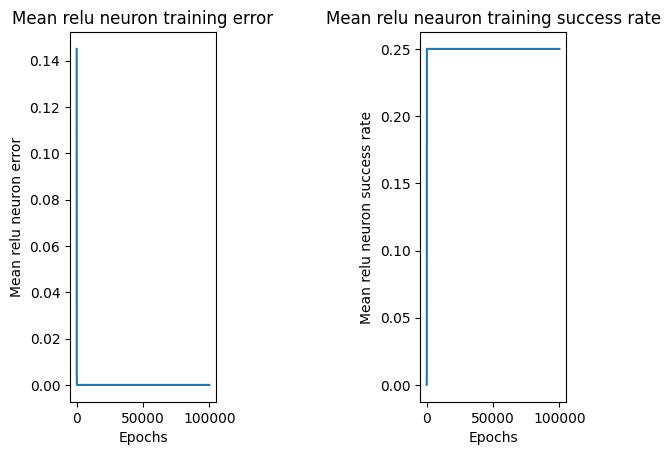

In [48]:
reluAnd = ReluNeuron(2)
reluAnd.train(and_inputs,and_labels,100000)


In [50]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {reluAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: 0 should be: 0
 input: [0 1] predicted value: 6.661338147750939e-16 should be: 0
 input: [1 0] predicted value: 6.661338147750939e-16 should be: 0
 input: [1 1] predicted value: 0.999999999999999 should be: 1


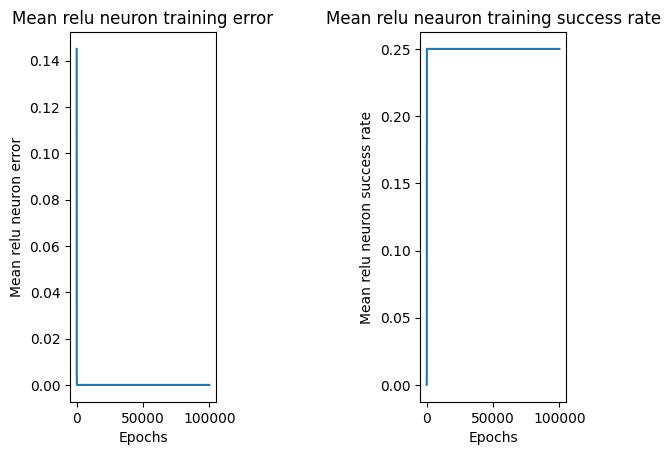

In [49]:

plt.subplot(1, 3, 1)
plt.plot(reluAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(reluAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski uywając funkcję relu dla 100 tysięcy cykli z learning rate 0,1 uczenia neurona:

- Neuron bardzo szyb ko się uczy
- średni błąd na poziomie 0,25 oznacza, ze tylko dla 1 na 4 otrymalismy dobry wynik
- wynik przewidywania dla wartości wejsciowych 1, 1 dla bramki and wyniósł okolo 0,99 co daje bardzo bliski wynik wartosci rzeczywistej - 1

## Neuron z funkcją relu, dla 100 000 cykli oraz learning rate = 0,01



In [51]:
reluAnd = ReluNeuron(2, 0.01)
reluAnd.train(and_inputs,and_labels,100000)

In [52]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {reluAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: 0 should be: 0
 input: [0 1] predicted value: 1.6431300764452317e-14 should be: 0
 input: [1 0] predicted value: 1.6653345369377348e-14 should be: 0
 input: [1 1] predicted value: 0.9999999999999838 should be: 1


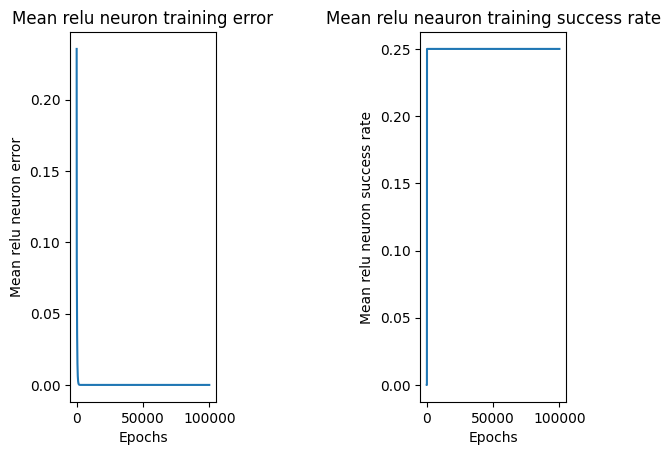

In [53]:
plt.subplot(1, 3, 1)
plt.plot(reluAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(reluAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski z neurona relu, ilosc cykli 100000 learning rate = 0.01
- neuron bardzo szybki zszedł z błedem do poziomu około 0, ale nigdy go nie osiągnął
- success rate wyniósł 0,25 czyli dobry wynik został przewidziany tylko dla 1 przypadku z 4

## Neuron relu, milion cykli, learning rate 0.00001

In [54]:
reluAnd = ReluNeuron(2, 0.0001)
reluAnd.train(and_inputs,and_labels,1000000)

In [55]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {reluAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: 0 should be: 0
 input: [0 1] predicted value: 1.2183004827193145e-08 should be: 0
 input: [1 0] predicted value: 1.2184476427812285e-08 should be: 0
 input: [1 1] predicted value: 0.9999999827754946 should be: 1


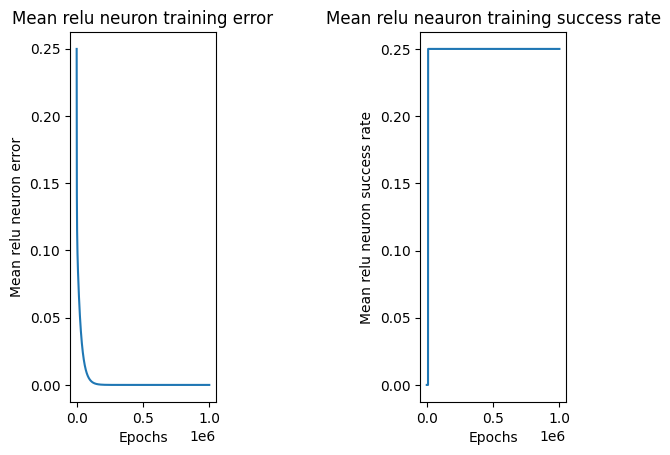

In [56]:
plt.subplot(1, 3, 1)
plt.plot(reluAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(reluAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski, neuron relu, milion cykli, learning rate 0,0001:

- Przewidywania tylko dla 1 przypadku były prawidłowe - dla wartości wejsciowych 0 oraz 0
- przewidywania dla 2 przypadków: 0,1 oraz 1,0 były bliskie 0, lecz nigdy go nie osiągneły
- przewidywania dla przypadku: 1,1 zbliyły się do 1, lecz nigdy jej nie osiągnęły 
- czas uczenia: 2 minuty 7 sekund

In [57]:
def hiperbolicTangens(x): 
    return (2 / (1 + 2.71828182845904523536028747135266249775724709369995 ** (-2 * x))) - 1

In [58]:

class HiperbolicTangensNeuron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.learning_rate = learning_rate
        self.errors = []
        self.success_rates = []
        
    def predict(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        return hiperbolicTangens(weighted_sum)
        
    def train(self, training_inputs, labels, epochs = 1):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            #on every epoch calculate the error and success rate
            self.errors.append(np.mean(([self.predict(input) for input in training_inputs] - labels) ** 2))
            self.success_rates.append(np.mean([self.predict(input) == label for input, label in zip(training_inputs, labels)]))

## Funkcja aktywacji: tangens hiperboliczny, 100 tysięcy cykli, learning rate = 0.1

In [59]:
tanNeuronAnd = HiperbolicTangensNeuron(2)
tanNeuronAnd.train(and_inputs,and_labels,100000)

In [60]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {tanNeuronAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: -0.31213884915225454 should be: 0
 input: [0 1] predicted value: 0.28369829145529657 should be: 0
 input: [1 0] predicted value: 0.3121388491522552 should be: 0
 input: [1 1] predicted value: 0.7340836488269018 should be: 1


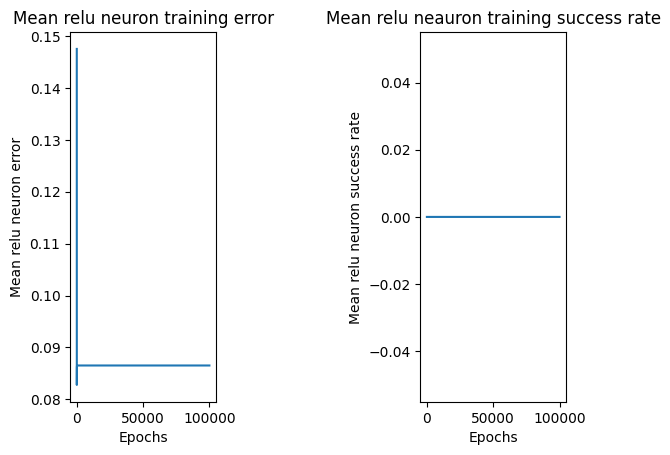

In [61]:
plt.subplot(1, 3, 1)
plt.plot(tanNeuronAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(tanNeuronAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski dla neuronu z funkcją aktywacji tangens hiperboliczny, 100 tysięcy cykli, learning rate 0.01:

- Neuron nigdy nie osiągnął idealnej wartości, nigdy tez nie był blisko, co widać na wykresie średniego błedu (wartość y nigdy nie była blisko 0)

## Funkcja aktywacji: tangens hiperboliczny, 100 tysięcy cykli, learning rate = 0.01

In [62]:
tanNeuronAnd = HiperbolicTangensNeuron(2, 0.01)
tanNeuronAnd.train(and_inputs,and_labels,100000)

In [63]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {tanNeuronAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: -0.2905875300455635 should be: 0
 input: [0 1] predicted value: 0.28792478913538533 should be: 0
 input: [1 0] predicted value: 0.2905875300455698 should be: 0
 input: [1 1] predicted value: 0.7137160864074934 should be: 1


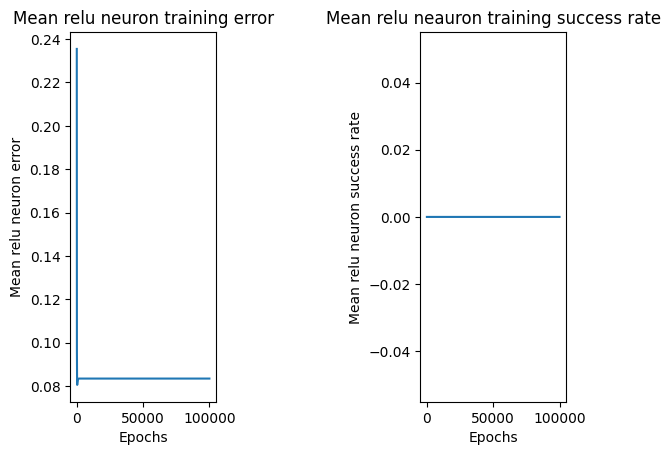

In [64]:
plt.subplot(1, 3, 1)
plt.plot(tanNeuronAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(tanNeuronAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski dla neuronu z funkcją aktywacji tangens hiperboliczny, 100 tysięcy cykli, learning rate 0.01:

- Neuron nigdy nie osiągnął idealnej wartości, nigdy tez nie był blisko, co widać na wykresie średniego błedu (wartość y nigdy nie była blisko 0), aczkolwiek błąd był mniejszy ni dla poprzedniego przypadku

## Funkcja aktywacji: tangens hiperboliczny, milion tysięcy cykli, learning rate = 0.0001

In [65]:
tanNeuronAnd = HiperbolicTangensNeuron(2, 0.0001)
tanNeuronAnd.train(and_inputs,and_labels,1000000)

In [66]:
for and_input, and_label in zip(and_inputs, and_labels):
    print(f' input: {and_input} predicted value: {tanNeuronAnd.predict(and_input)} should be: {and_label}')

 input: [0 0] predicted value: -0.2884136679962013 should be: 0
 input: [0 1] predicted value: 0.2883872255062203 should be: 0
 input: [1 0] predicted value: 0.2884136679975926 should be: 0
 input: [1 1] predicted value: 0.7116290415518007 should be: 1


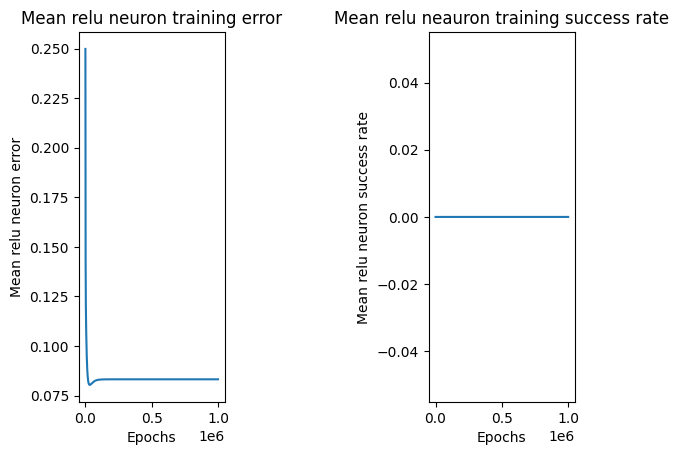

In [67]:
plt.subplot(1, 3, 1)
plt.plot(tanNeuronAnd.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron error')
plt.title('Mean relu neuron training error')

plt.subplot(1, 3, 3)
plt.plot(tanNeuronAnd.success_rates)
plt.xlabel('Epochs')
plt.ylabel('Mean relu neuron success rate')
plt.title('Mean relu neauron training success rate')

plt.show()

## Wnioski dla neuronu z funkcją aktywacji tangens hiperboliczny, 100 tysięcy cykli, learning rate 0.01:

- Neuron nigdy nie osiągnął idealnej wartości, nigdy tez nie był blisko, co widać na wykresie średniego błedu (wartość y nigdy nie była blisko 0), aczkolwiek błąd był mniejszy niz dla poprzedniego przypadku
- czas uczenia neuronu: 2 minuty 5 sekund
- neuron bardzo szybko się nauczył, co widać na wykresie średniego błędu i widać, ze przy okolo 300 tysiącach cykli, błąd był ju bardzo podobny

# Ogólnie wnioski

- Jedynie w przypadku funkcji heaviside neuron był w stanie się nauczyć przewidywać dokładną wartość - z tego powodu ze wartosc prawdziwa wynosila 0 lub 1, podobnie jak wartosci zwracane przez tą funkcję (-1, 0, 1)
- inne funkcji aktywacji neuronu zwracały wartości ciągłe z tego powodu nie były one w stanie podać dokładnej prawdziwej wartośc, aczkolwiek były one bliskie tych wartosc
- zauwazono zaleznosc: czym mniejszy learning rate, tym dokładniejszy będzie przewidywany wynik, ale potrzebna jest tez wieksza liczba cykli, eby nauczyć się dokładnie
- czym większa liczba cykli tym dłzuej trwa uczenie, jest to wynik liniowy, przez co wiedząc, ze dla 100 tysiecy cykli neuron uczy się około 15 - 20 sekund, dla 1 miliona cykli uczy się około 2,5 minuty(około 150 sekund), mozna załoyć, ze dla miliarda cykli wynik wyniósłby około 1500 sekund czyli około 25 minut
